<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/Breast_Cancer_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###Let's consider an example using the popular Breast Cancer Wisconsin dataset, which is often used for classification tasks. In this example, we'll perform linear classification using the Logistic Regression model to predict whether a tumor is malignant (1) or benign (0) based on various features.

In [4]:
#Example for Binary Classification using Logistic Regression Model without imbalanced data handling

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000)
#model = LogisticRegression()

In [11]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
# Make predictions on the testing data
predictions = model.predict(X_test)

In [13]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9561


In [15]:
#Example for Binary Classification using Logistic Regression Model with imbalanced data handling

#Imbalanced Data Handling using: under-sampling using RandomUnderSampler
#Library: imbalanced-learn provides resampling techniques like RandomUnderSampler, RandomOverSampler, and SMOTE (Synthetic Minority Over-sampling Technique).

In [16]:
##Imbalanced Data Handling using: under-sampling using RandomUnderSampler

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from numpy import where

In [19]:
#Import* Dataset

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [22]:
print(X.shape, y.shape)

(569, 30) (569,)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


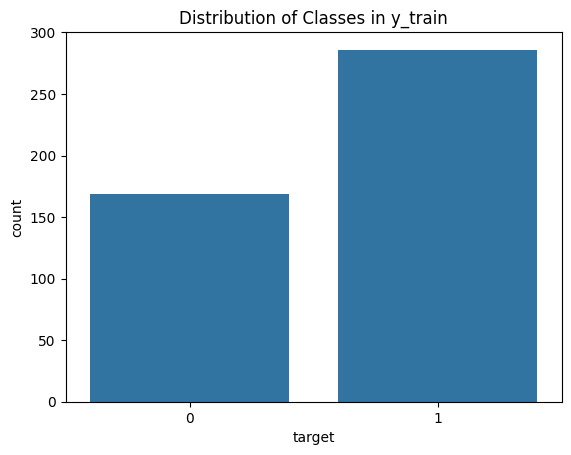

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title('Distribution of Classes in y_train')
plt.show()

In [26]:
print("Class Distribution in y_train:")
print(y_train.value_counts())

Class Distribution in y_train:
1    286
0    169
Name: target, dtype: int64


In [27]:
from imblearn import under_sampling, over_sampling

#Example of under-sampling using RandomUnderSampler
under_sampler = under_sampling.RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

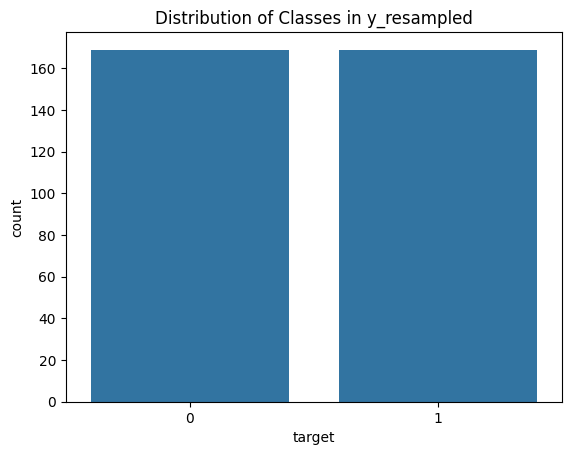

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Distribution of Classes in y_resampled')
plt.show()

In [29]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000)

In [30]:
# Train the model on the training data
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=10000)

In [31]:
# Make predictions on the testing data
predictions = model.predict(X_test)

In [32]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [33]:
# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




Confusion Matrix:


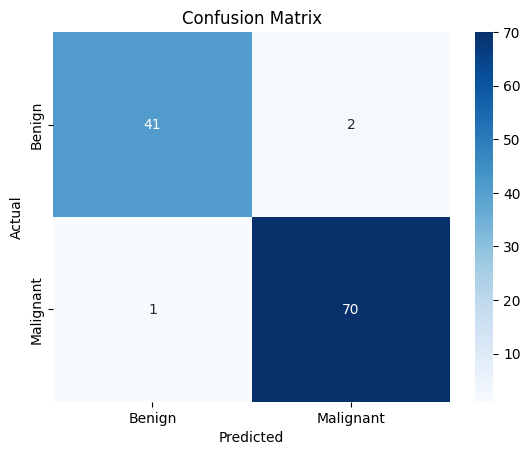

In [34]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
## Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:


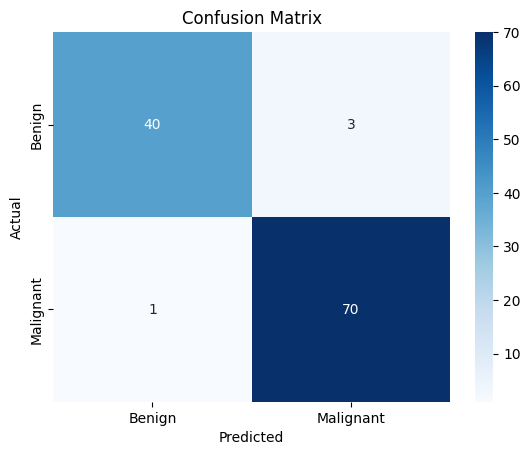

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from imblearn import under_sampling, over_sampling

# Load the breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Example of Over-sampling using SMOTE
over_sampler = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_train_SMOTE, y_train_SMOTE = over_sampler.fit_resample(X_train,y_train)

# Visualize the proportion of borrowers
#sns.countplot(x=y_train_SMOTE)
#plt.title('Distribution of Classes in y_train_SMOTE')
#plt.show()


# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model on the training data
model.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions on the testing data
predictions = model.predict(X_test)

#Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

#Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
## Analyse the acccuracy obtained in the above three variations

In [41]:
##You can also try with othe (All) binary classifiers

##Initializing each binary classifier

In [42]:
#https://www.learndatasci.com/glossary/binary-classification/#:~:text=In%20a%20medical%20diagnosis%2C%20a,diagnosis%20are%20positive%20and%20negative.

# To quickly train each model in a loop, we'll initialize each model and store it by name in a dictionary


models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver = 'newton-cg', max_iter=100)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=1000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [44]:
##Performance evaluation of each binary classifier
##Now that we've initialized the models, we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
import pandas as pd

df_model =pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.956140,0.985915,0.945946
Support Vector Machines,0.929825,1.000000,0.898734
Decision Trees,0.938596,0.943662,0.957143
Random Forest,0.956140,0.971831,0.958333
Naive Bayes,0.973684,1.000000,0.959459
K-Nearest Neighbor,0.956140,1.000000,0.934211


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

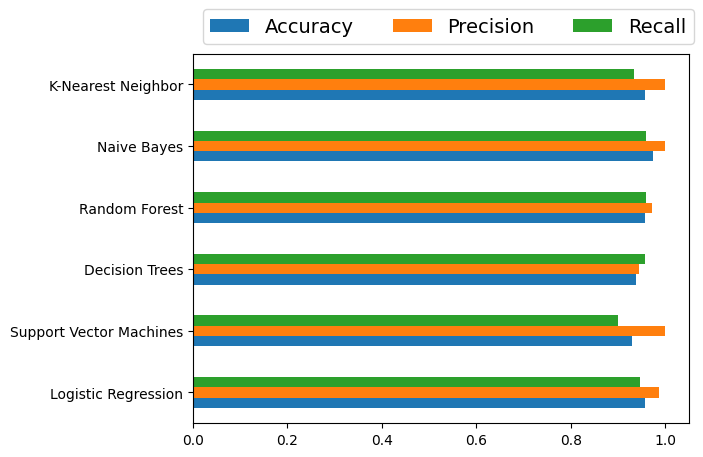

In [47]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout